In [1]:
#importing relevant packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#intializing seaborn plots and importing relevant data
sns.set()
status_data = pd.read_csv('E:\EECS\Corona project\COVID_final\patient_data.csv')
status_test = pd.read_csv('E:\EECS\Corona project\COVID_final\status_test_data.csv')
country_data = pd.read_csv('E:\EECS\Corona project\COVID_final\covid_19_data.csv')

In [3]:
#extracting relevant quantities from status data
status_data = status_data[['id', 'gender', 'age', 'death', 'recovered']]

#takes a dataframe and convert binary values (1/0) to boolean (True/False)
def convert(df):
    bools = ['death', 'recovered']
    df[bools] = df[bools].fillna(0)
    df.loc[(df['death'].str.len() > 1.0), 'death'] = 1
    df.loc[(df['recovered'].str.len() > 1.0), 'recovered'] = 1
    df[bools] = df[bools].astype(int)
    df[bools] = df[bools].astype(bool)
    return df

In [4]:
#takes a dataframe and a column string and returns a dataframe containing columns with death, recovered, and the input string
#the returned string also has all non-existent entries in the input column removed
def extract(df, column):
    df = df[[column, 'death', 'recovered']]
    df = df.dropna(subset=[column])
    return df

In [5]:
#testing whether function convert successfully convered binary values to booleans
status_test_data = convert(status_test)
status_test_data.dtypes

id             int64
gender        object
age          float64
death           bool
recovered       bool
dtype: object

In [6]:
status_test_data

id  gender   age  death  recovered
0   1    male   5.0  False      False
1   2    male  20.0   True      False
2   3  female  30.0  False      False
3   4  female  80.0  False       True
4   5     NaN  35.0  False      False
5   6    male  60.0  False      False
6   7     NaN   NaN   True      False
7   8     NaN   NaN  False      False
8   9  female  41.0  False       True
9  10    male  34.0   True      False

In [7]:
#testing whether entries of unknown gender is filtered out
gender_test = extract(status_test_data, 'gender')
gender_test

gender  death  recovered
0    male  False      False
1    male   True      False
2  female  False      False
3  female  False       True
5    male  False      False
8  female  False       True
9    male   True      False

In [8]:
#testing whether entries of unknown gender is filtered out
age_test = extract(status_test_data, 'age')
age_test

age  death  recovered
0   5.0  False      False
1  20.0   True      False
2  30.0  False      False
3  80.0  False       True
4  35.0  False      False
5  60.0  False      False
8  41.0  False       True
9  34.0   True      False

In [9]:
status_data = convert(status_data)

#extracting gender vs. status data and clearing out data with unknown gender
gender = extract(status_data, 'gender')
total = len(gender)
male = len(gender[gender['gender'] == 'male'])
female = len(gender[gender['gender'] == 'female'])

#summing patient status count by gender
filtered = gender.groupby('gender').sum()

#changing count to percentage and including new column for percentage of genders in patient data
filtered['has contracted'] = [male, female]
filtered = filtered / total * 100
filtered = filtered.reset_index()
filtered

gender     death  recovered  has contracted
0  female  1.528117   4.889976       55.745721
1    male  3.056235   5.929095       44.254279

In [10]:
#reshaping the gender percentage data for plotting
reshaped = filtered.melt(id_vars=['gender'])
reshaped.columns = ['gender', 'status', 'percentage']
reshaped = reshaped.sort_values(by=['percentage'], ascending=False)
reshaped

gender          status  percentage
4  female  has contracted   55.745721
5    male  has contracted   44.254279
3    male       recovered    5.929095
2  female       recovered    4.889976
1    male           death    3.056235
0  female           death    1.528117

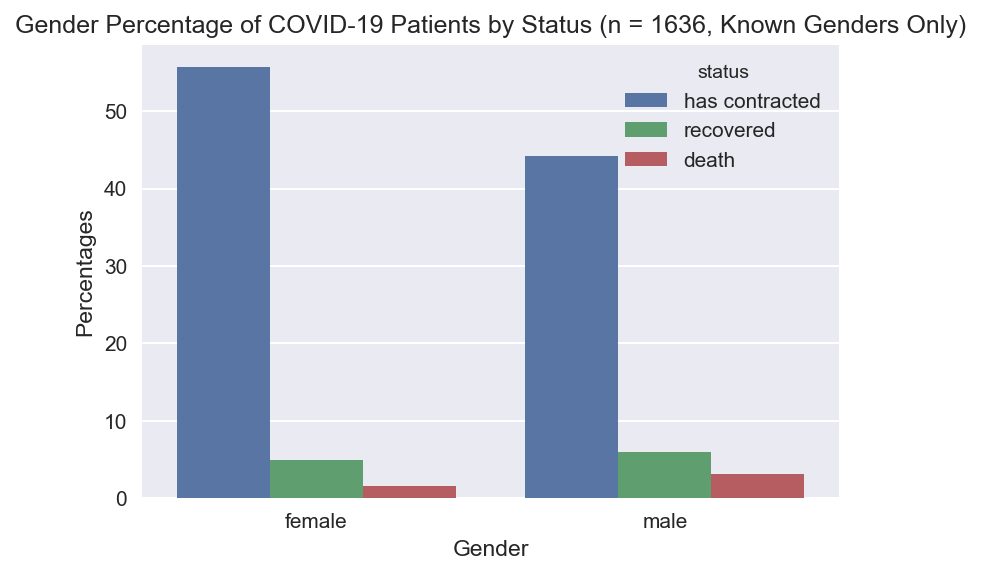

In [11]:
#creating gender bar plot
plt.figure(dpi=150)
gender_plot = sns.barplot(x='gender', y='percentage', data=reshaped, hue='status')
plt.title('Gender Percentage of COVID-19 Patients by Status (n = 1636, Known Genders Only)')
plt.ylabel('Percentages')
plt.xlabel('Gender')
gender_plot

In [12]:
#extracting age vs. status data and clearing out data with unknown age
age = extract(status_data, 'age')
total = len(age)

#recatagorizing age from numbers into age groups
age_desc = ['Adolescents(<20)', 'Young Adults (20~39)', 'Adults (40~64)', 'Elderly (65+)']
combined = pd.DataFrame(data={})
adol = age[age.age < 20].copy()
adol.age = age_desc[0]
young = age[(age.age >= 20) & (age.age < 40)].copy()
young.age = age_desc[1]
adults = age[(age.age >= 40) & (age.age < 65)].copy()
adults.age = age_desc[2]
elderly = age[age.age >= 65].copy()
elderly.age = age_desc[3]

#combining dataframes of different age groups, then summing patient status count by age groups
combined = pd.concat([adol, young, adults, elderly])

#changing count to percentage and including new column for percentage of age group in patient data
combined = combined.groupby('age').sum()
combined['has contracted'] = [len(adol), len(adults), len(elderly), len(young)]
combined = combined / total * 100
combined = combined.reindex(age_desc).reset_index()
combined

age     death  recovered  has contracted
0      Adolescents(<20)  0.000000   0.864362        4.255319
1  Young Adults (20~39)  0.199468   3.856383       25.132979
2        Adults (40~64)  0.997340   5.252660       42.287234
3         Elderly (65+)  3.856383   1.130319       28.324468

In [13]:
#reshaping the age percentage data for plotting
reshaped = combined.melt(id_vars=['age'])
reshaped.columns = ['age', 'status', 'percentage']
reshaped

age          status  percentage
0       Adolescents(<20)           death    0.000000
1   Young Adults (20~39)           death    0.199468
2         Adults (40~64)           death    0.997340
3          Elderly (65+)           death    3.856383
4       Adolescents(<20)       recovered    0.864362
5   Young Adults (20~39)       recovered    3.856383
6         Adults (40~64)       recovered    5.252660
7          Elderly (65+)       recovered    1.130319
8       Adolescents(<20)  has contracted    4.255319
9   Young Adults (20~39)  has contracted   25.132979
10        Adults (40~64)  has contracted   42.287234
11         Elderly (65+)  has contracted   28.324468

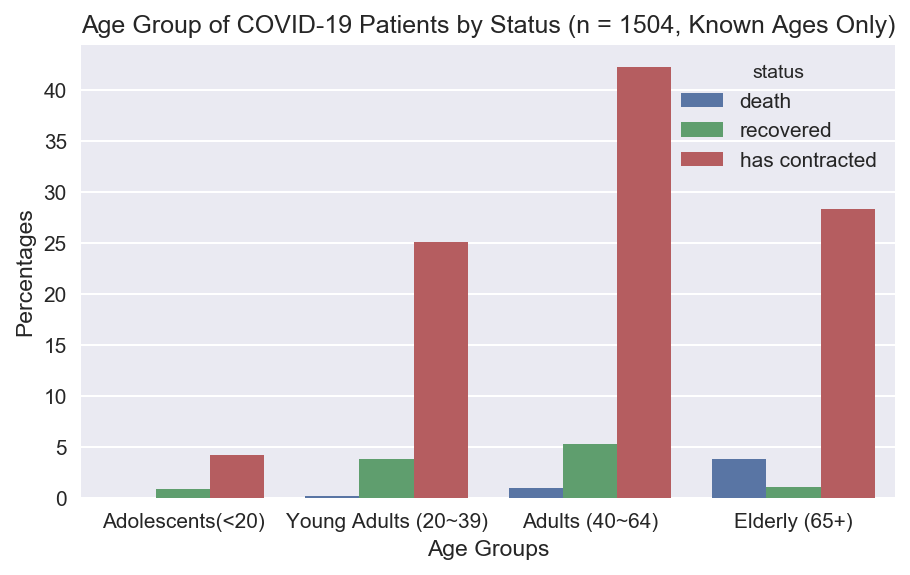

In [14]:
#creating gender bar plot
plt.figure(figsize=(7,4), dpi=150)
age_plot = sns.barplot(x='age', y='percentage', data=reshaped, hue='status')
plt.title('Age Group of COVID-19 Patients by Status (n = 1504, Known Ages Only)')
plt.ylabel('Percentages')
plt.xlabel('Age Groups')
age_plot

In [15]:
#takes in a dataframe and melts the dataframe based on Country/Region, and renaming the columns for formatting
#returns resulting dataframe 
def consolidate(df):
    df = df.melt(id_vars=['Country/Region'])
    df.columns = ['Country/Region', 'Status', 'Count']
    return df

In [16]:
#takes in a dataframe and a note string and creates a bar plot of Country/Region count of patients by status. Title also 
#includes a note stating data as well as range of confirmed patients
def country_plot(df, note):
    plot = sns.barplot(x='Country/Region', y='Count', data=df, hue='Status')
    plt.title('Country/Region Count of Patients by Status (' + note + ')')
    plt.ylabel('Count')
    plt.xlabel('Country/Region')
    plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
    plot

In [17]:
#extracting country vs. status data on two separate dates: 3/7/2020 and 3/14/2020
current = country_data[(country_data['ObservationDate'] == '03/14/2020')]
last_week = country_data[(country_data['ObservationDate'] == '03/07/2020')]
current = current[['Country/Region', 'Confirmed', 'Deaths', 'Recovered']]
last_week = last_week[['Country/Region', 'Confirmed', 'Deaths', 'Recovered']]

#summing both dataframes based on country
current = current.groupby('Country/Region').sum().reset_index()
last_week = last_week.groupby('Country/Region').sum().reset_index()

In [18]:
#creating a dataframe to represent the percent growth rate of the patients in each country from 3/7/2020 to 3/14/2020
#only includes countries/regions that was in the 3/7/2020 dataframe
growth = last_week.loc[:, ['Country/Region']].merge(current, left_on='Country/Region', right_on='Country/Region', how='left')
growth = consolidate(growth)
growth['Count'] = growth['Count'] / consolidate(last_week)['Count']
growth['Count'] = (growth['Count'] - 1) * 100

#for simplicity purposes, setting entries with 0 cases on 3/7/2020 and non-existent entries to 0 growth rate
growth = growth.replace([np.inf, -np.inf], np.nan).fillna(0)
growth = growth[~(growth['Count'] == 0)]
growth

Country/Region     Status        Count
0               Afghanistan  Confirmed  1000.000000
1                   Algeria  Confirmed   117.647059
3                 Argentina  Confirmed   325.000000
4                   Armenia  Confirmed  1700.000000
5                 Australia  Confirmed   296.825397
6                   Austria  Confirmed   729.113924
7                Azerbaijan  Confirmed    66.666667
8                   Bahrain  Confirmed   147.058824
9                   Belarus  Confirmed   350.000000
10                  Belgium  Confirmed   307.692308
12   Bosnia and Herzegovina  Confirmed   500.000000
13                   Brazil  Confirmed  1061.538462
14                 Cambodia  Confirmed   600.000000
15                 Cameroon  Confirmed   100.000000
16                   Canada  Confirmed   262.962963
17                    Chile  Confirmed  1425.000000
18                 Colombia  Confirmed  2100.000000
19               Costa Rica  Confirmed  2500.000000
20                  Croatia  Confirmed   216.666667
21           Czech Republic  Confirmed   894.736842
22                  Denmark  Confirmed  3534.782609
23       Dominican Republic  Confirmed   450.000000
24                  Ecuador  Confirmed   115.384615
25                    Egypt  Confirmed   626.666667
26                  Estonia  Confirmed  1050.000000
28                  Finland  Confirmed  1400.000000
29                   France  Confirmed   372.075869
31                  Georgia  Confirmed   650.000000
32                  Germany  Confirmed   473.842303
34                   Greece  Confirmed   395.652174
..                      ...        ...          ...
190                   Spain     Deaths  1850.000000
193             Switzerland     Deaths  1200.000000
198                      UK     Deaths   950.000000
199                      US     Deaths   217.647059
209               Australia  Recovered     9.523810
212                 Bahrain  Recovered  1000.000000
229                   Egypt  Recovered  2600.000000
236                 Germany  Recovered   155.555556
242                   India  Recovered    33.333333
244                    Iran  Recovered    77.291791
247                  Israel  Recovered   100.000000
248                   Italy  Recovered   233.786078
249                   Japan  Recovered    55.263158
258          Mainland China  Recovered    18.353221
259                Malaysia  Recovered    52.173913
262                  Mexico  Recovered   300.000000
271                    Oman  Recovered   350.000000
272                  Others  Recovered   712.500000
276             Philippines  Recovered   100.000000
280                 Romania  Recovered   200.000000
281                  Russia  Recovered   300.000000
287               Singapore  Recovered    34.615385
291             South Korea  Recovered   277.777778
292                   Spain  Recovered  1623.333333
295             Switzerland  Recovered    33.333333
296                  Taiwan  Recovered    66.666667
297                Thailand  Recovered    12.903226
300                      UK  Recovered     5.555556
301                      US  Recovered    50.000000
303    United Arab Emirates  Recovered   142.857143

[130 rows x 3 columns]

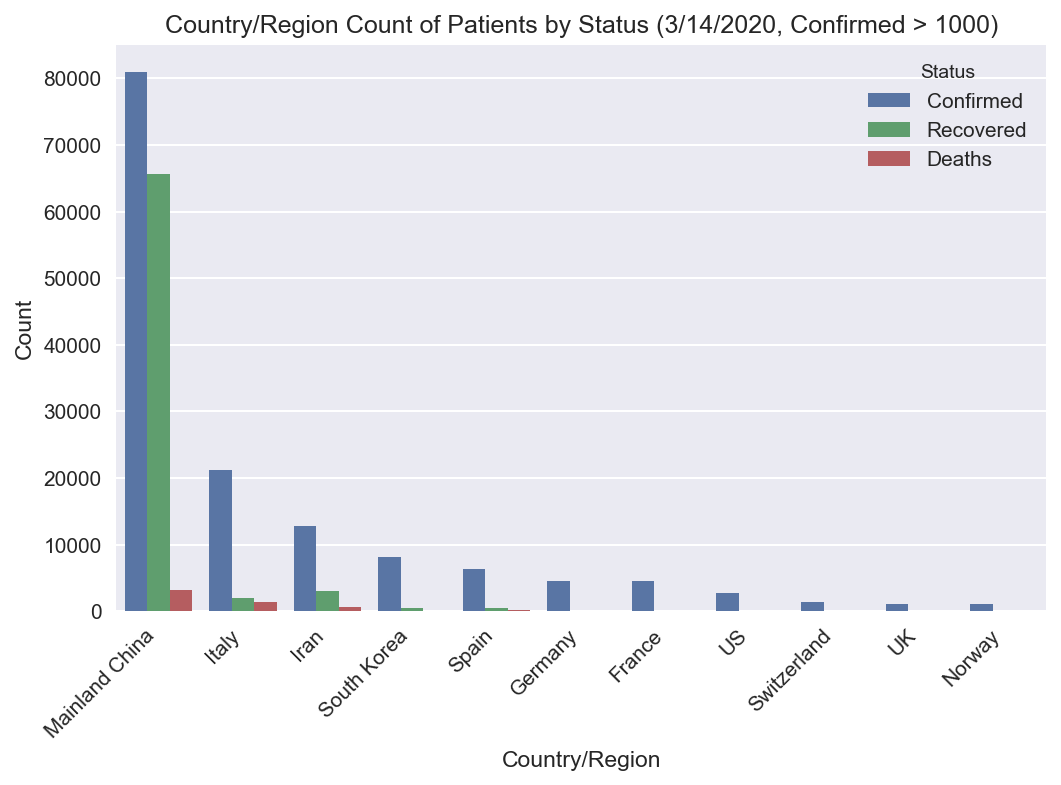

In [19]:
#extracting from the 3/14/2020 dataframe Country/Region entries with more than 1000 confirmed cases and creating a bar plot
more = current[current['Confirmed'] > 1000]
more = consolidate(more)
more = more.sort_values(by=['Count', 'Country/Region'], ascending=False)
plt.figure(figsize=(8,5), dpi=150)
country_plot(more, '3/14/2020, Confirmed > 1000')

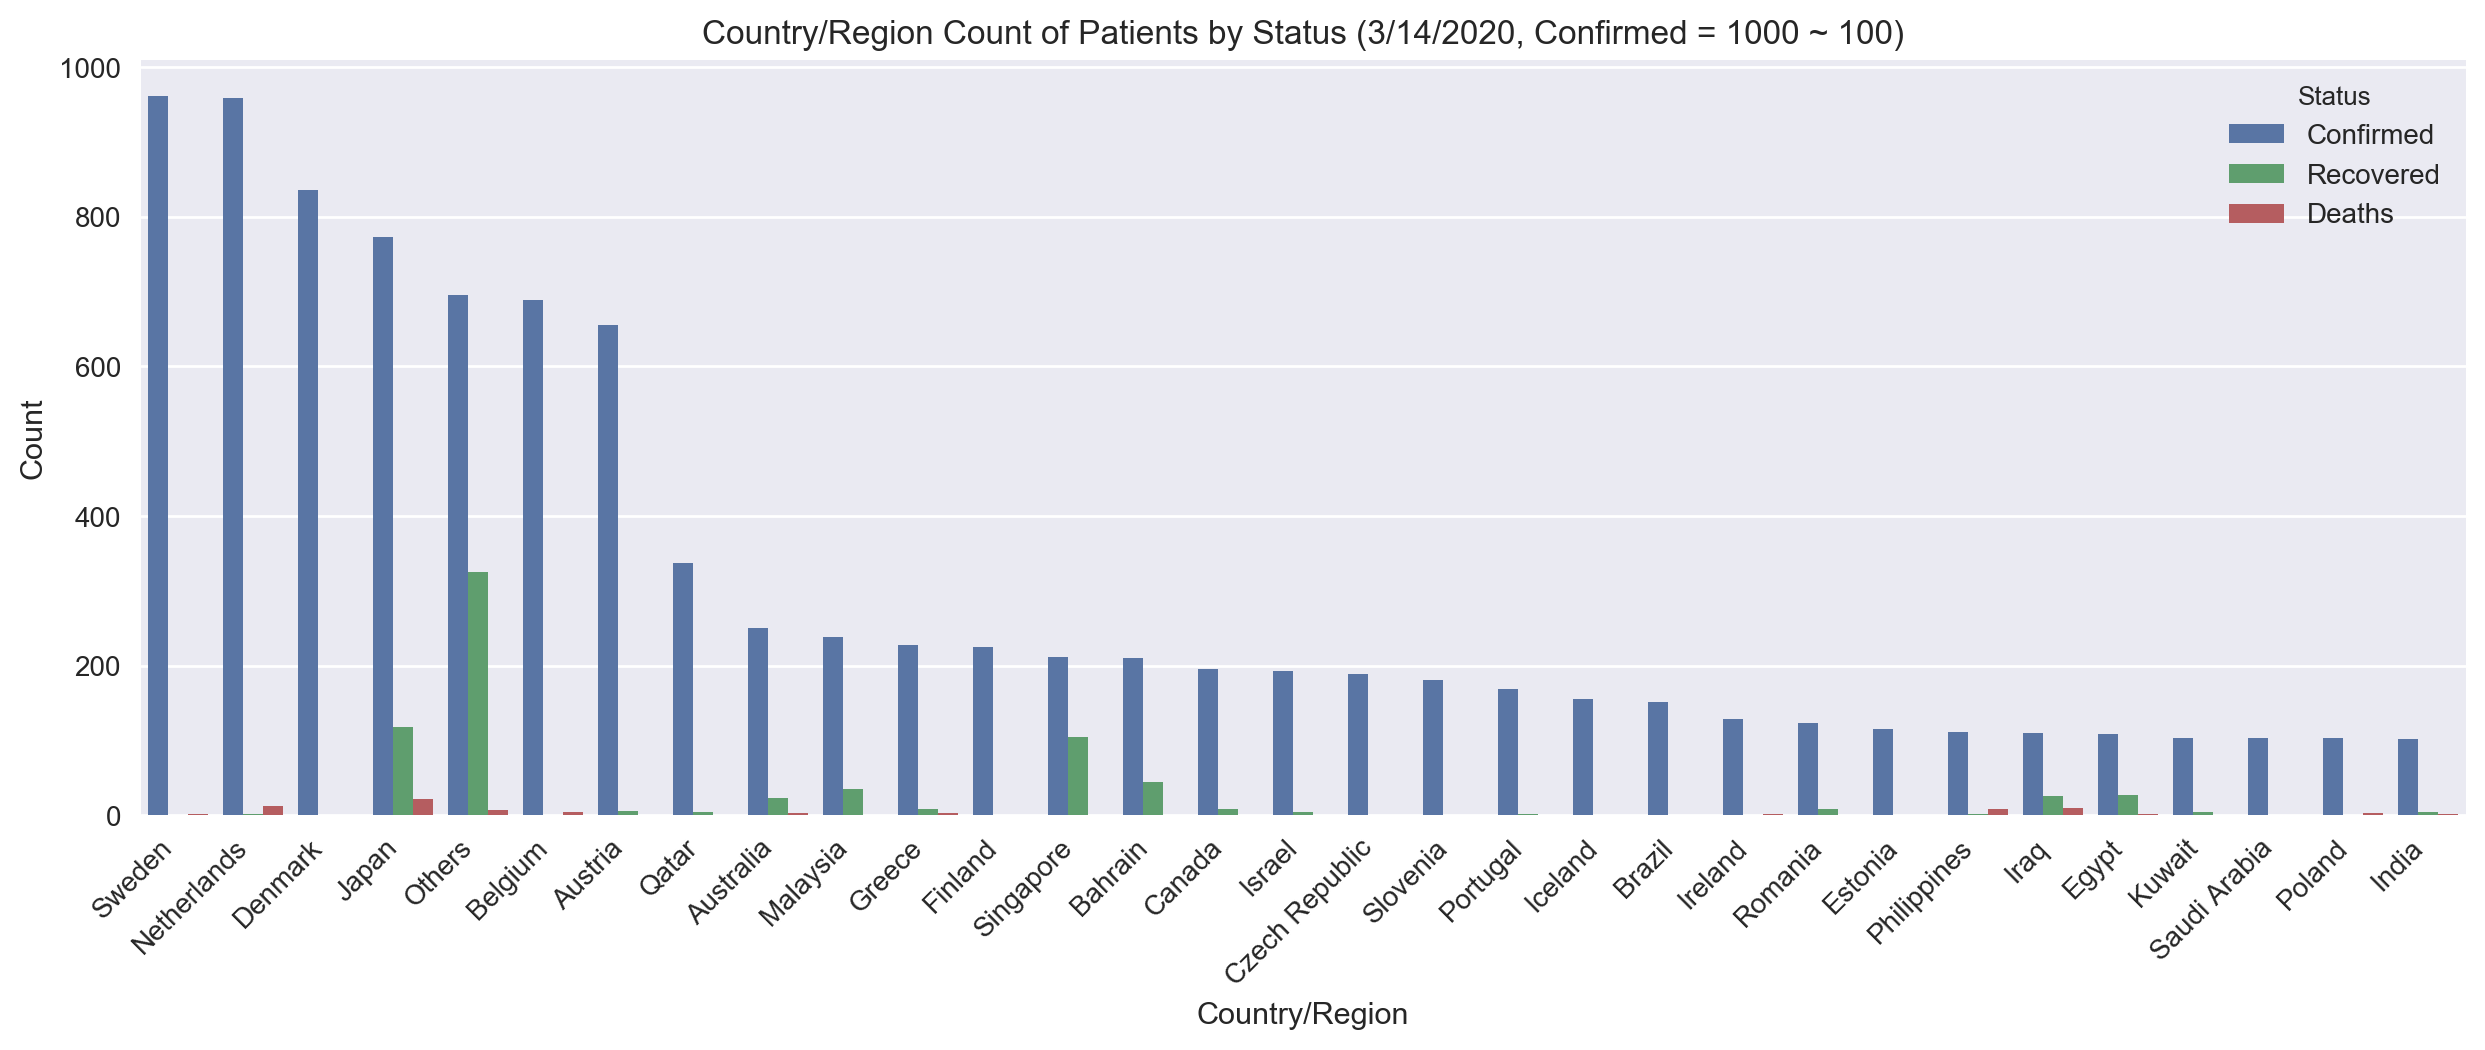

In [20]:
#extracting from the 3/14/2020 dataframe Country/Region entries with between 1000 and 100 confirmed cases and creating 
#a bar plot
less = current[(current['Confirmed'] <= 1000) & (current['Confirmed'] > 100)]
less = consolidate(less)
less = less.sort_values(by=['Count', 'Country/Region'], ascending=False)
plt.figure(figsize=(15,5), dpi=200)
country_plot(less, '3/14/2020, Confirmed = 1000 ~ 100')

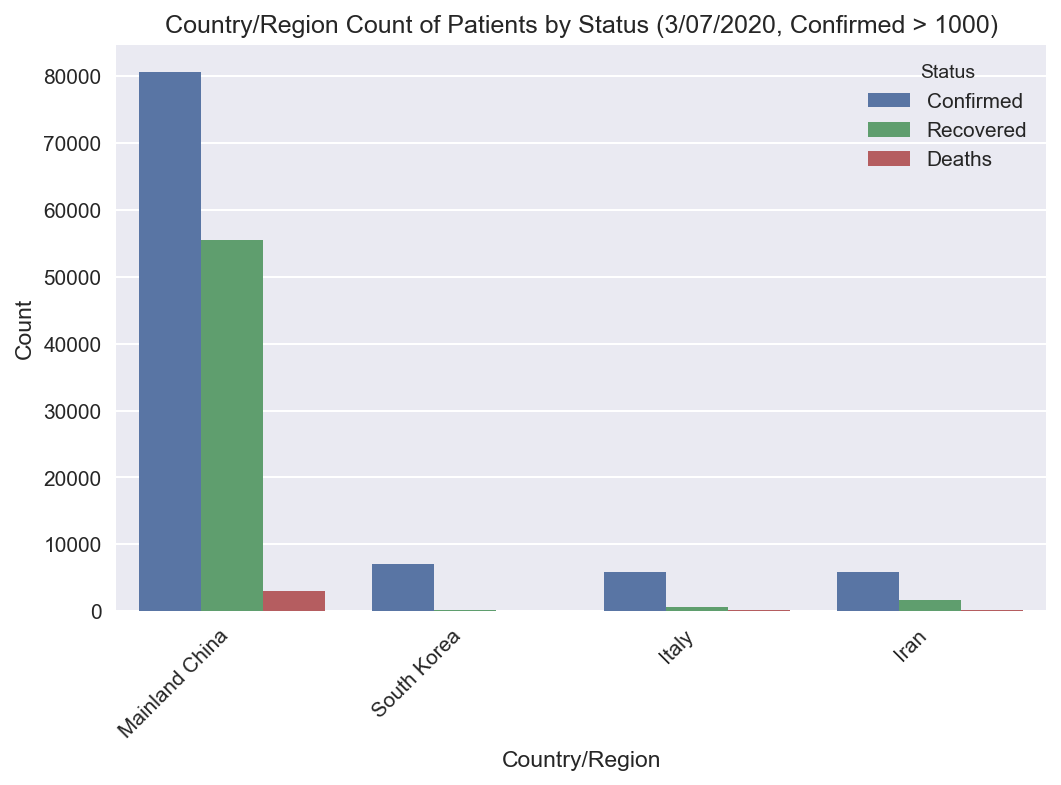

In [21]:
#extracting from the 3/7/2020 dataframe Country/Region entries with more than 1000 confirmed cases and creating a bar plot
more = last_week[last_week['Confirmed'] > 1000]
more = consolidate(more)
more = more.sort_values(by=['Count', 'Country/Region'], ascending=False)
plt.figure(figsize=(8,5), dpi=150)
country_plot(more, '3/07/2020, Confirmed > 1000')

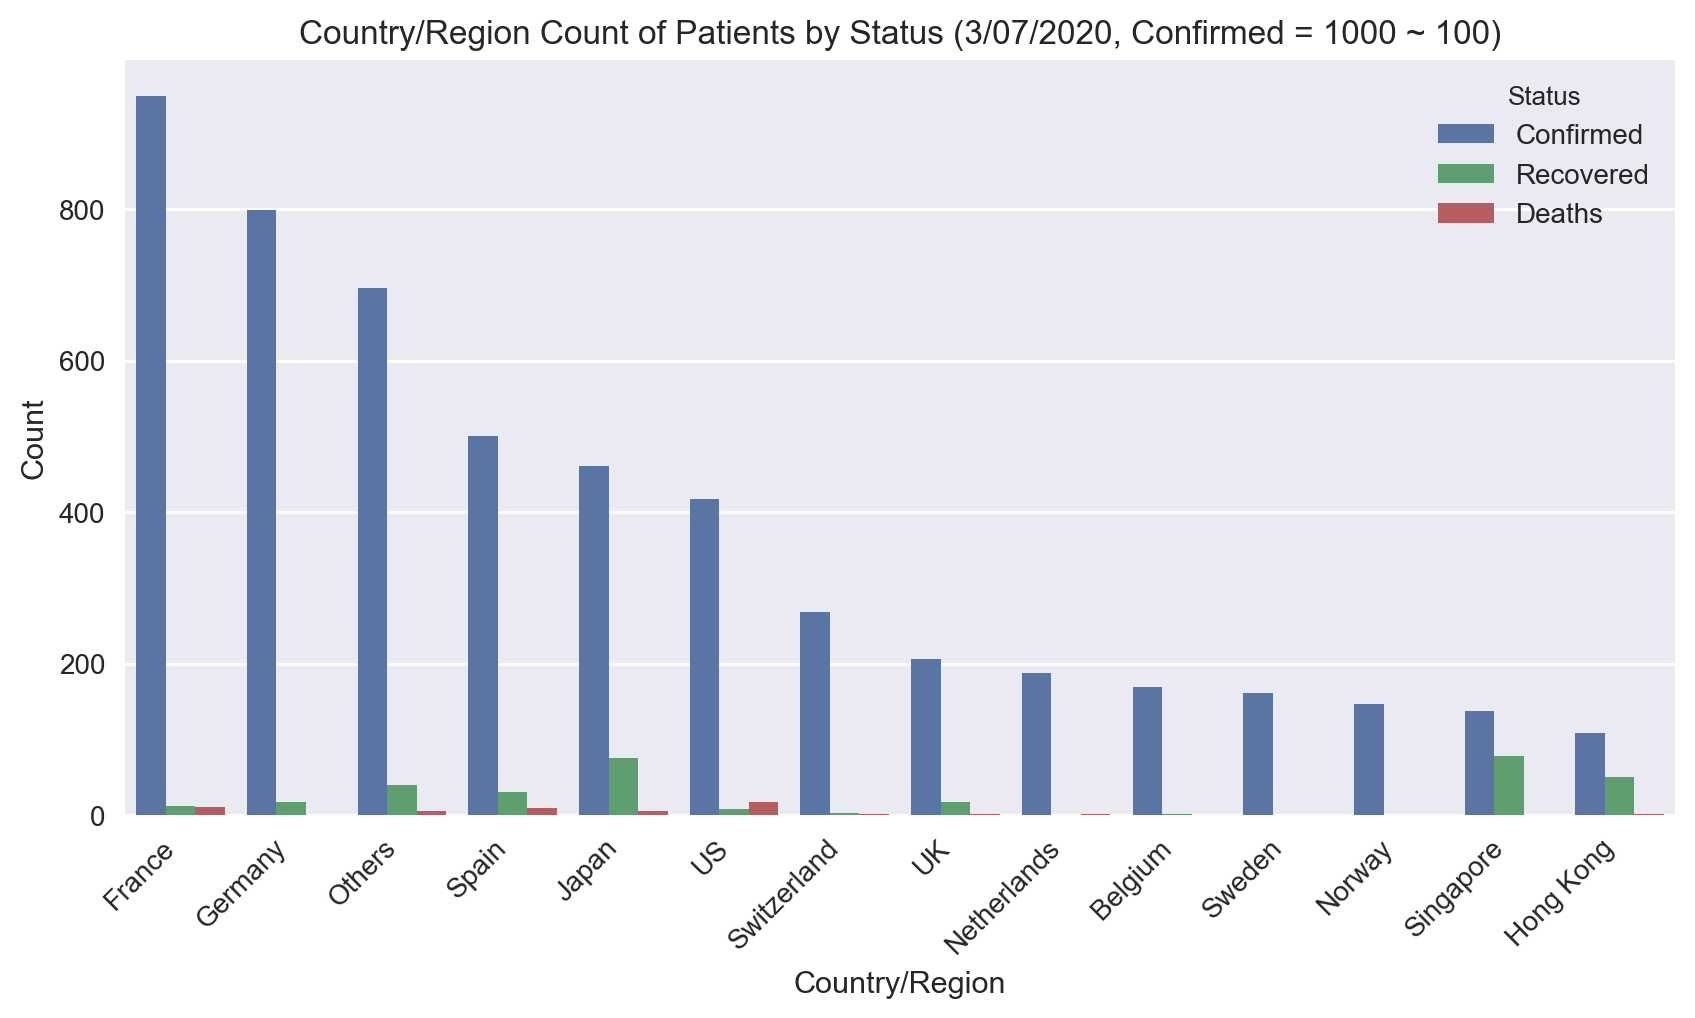

In [22]:
#extracting from the 3/7/2020 dataframe Country/Region entries with between 1000 and 100 confirmed cases and creating 
#a bar plot
less = last_week[(last_week['Confirmed'] <= 1000) & (last_week['Confirmed'] > 100)]
less = consolidate(less)
less = less.sort_values(by=['Count', 'Country/Region'], ascending=False)
plt.figure(figsize=(10,5), dpi=200)
country_plot(less, '3/07/2020, Confirmed = 1000 ~ 100')

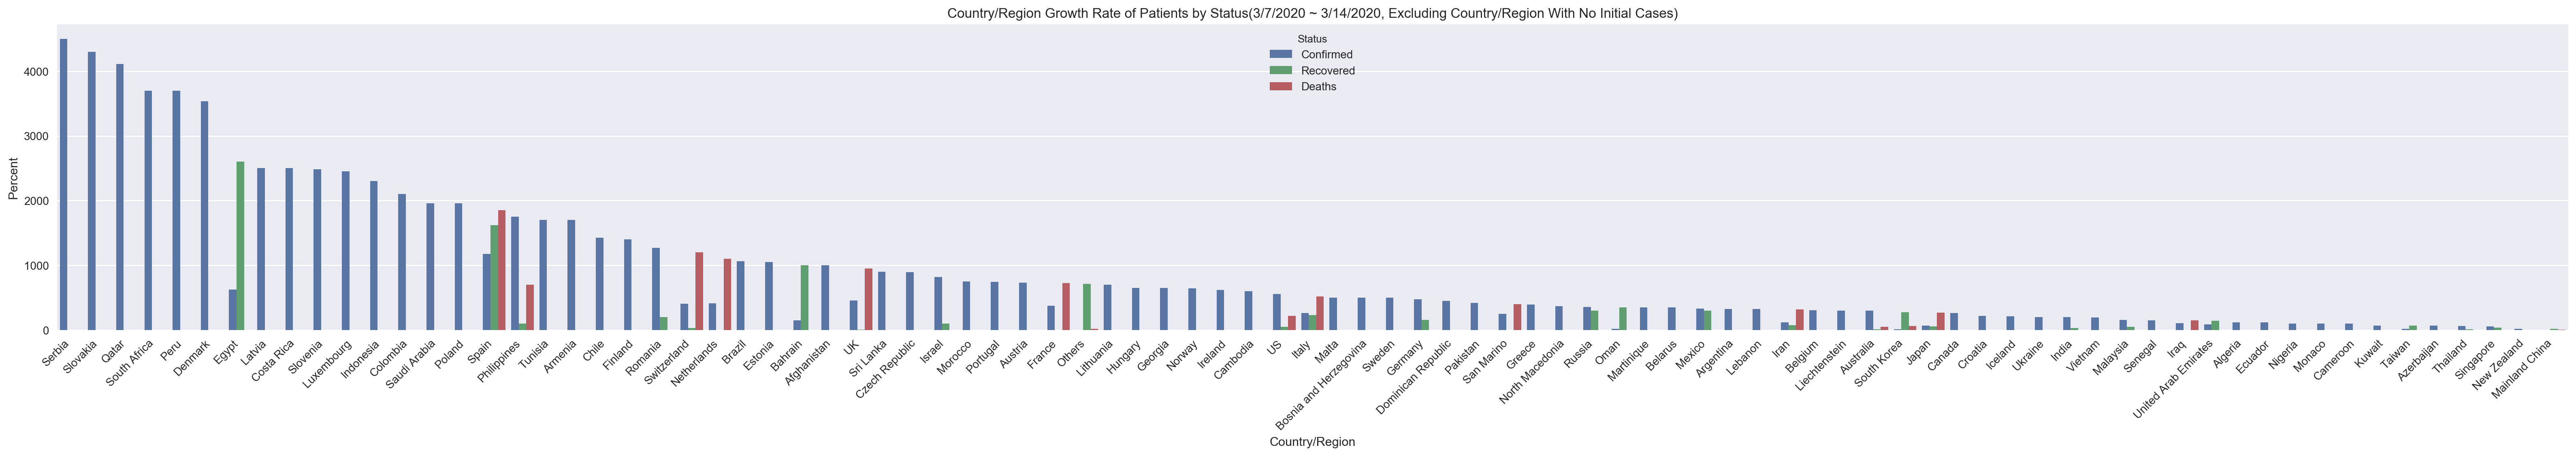

In [23]:
#creating a bar plot for growth rate of patient cases by status between 3/7/2020 and 3/14/2020
growth = growth.sort_values(by=['Count', 'Country/Region'], ascending=False)
plt.figure(figsize=(40,5), dpi=200)
plot = sns.barplot(x='Country/Region', y='Count', data=growth, hue='Status')
plt.title('Country/Region Growth Rate of Patients by Status(3/7/2020 ~ 3/14/2020, Excluding Country/Region With No Initial Cases)')
plt.ylabel('Percent')
plt.xlabel('Country/Region')
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plot